# Data Preprocessing and Feature Engineering

| ID | Name | Country | Age | Member | Score A | Score B | Class |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 7896 | Mark | Canada | 45 | 1 | 180 | 9 | A
| 9865 | Yuze | Japan | | 0 | 165 | 8.5 | B
| 4678 | Becky | USA | 38 | Y | 140 | 6 | B
| 3324 | Mike | 890 | 50 | 0 | 90 | 8.7 | C
| 7896 | Mark | Canada | 45 | 1 | 180 | 9 | A
| 7896 | Jose | Mexico | 98 | 0 | 60.5 | 5 | A
| 8962 | Emma | Germany | 39 | 1 | 140 | 8 | B



Observed issues in the data above:
- missing values in Age colum
- Country has a mix of num and text value. Looks like 890 is wrong
- Member col has data type inconsistency Y vs 1
- Duplicates rows and ID values. It's not unique
- ID columns seems to be unnecessary
- Score A and B have different scale. It needs scaling or normalization
- Age has a possible outlier
- we have categorical columns. They need ot be converted to numerical for ML

## Advantages of Data Preprocessing and Feature Engineering
- It is the magic touch for AI and ML.Very essential steps to the DS pipeline before deploying ML
- Features (columns) are the building blocks of ML prediction. Refining them will help improve the model performance and accuracy.
- Feature engineering can create additional features that could help the model find hidden patterns in teh data (feature extraction)
- To perform good FE and DP:
    - Technical expertise
    - Domain knowledge 
    - Empirical process in statistics and machine learning

## Techniques
1. Imputation: handling missing values
2. Outlier Treatment: removing/replacing outliers
3. Binning: feature extraction by converting continuous values to ranges
4. Grouping: feature extraction using aggregation
5. Scaling: normalization of numerical ranges
6. Encoding: converting categorical variables into numerical
7. Dimensionality Reduction

In [1]:
import pandas as pd
import numpy as np

## Imputation

In [20]:
students = {
    'Name' : ['Mark', 'Alex', 'John', 'Amy', 'Steve', 'Ally', 'Kelly', 'Todd'],
    'Score' : [40, np.NaN, 44, np.NaN, 26, 39, 42, np.NaN],
    'University' : ['UTC', np.NaN, 'MSU', 'MIT', 'CalTech', 'CalTech', 'CalTech', 'MSU'],
}
  
# creating a Dataframe object
 
df = pd.DataFrame(students)
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,NaN,NaN
2,John,44.0,MSU
3,Amy,NaN,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,NaN,MSU


In [4]:
# for numerical, use median or mean to replace missing values
print(df['Score'].mean(skipna=True))

38.2


`pip install scikit-learn`

In [5]:
# method 1
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') # define the engine for using average for missing values 

#apply the imputation
df['Score'] = imputer.fit_transform(df['Score'].values.reshape(-1,1)) # values converts into numpy and reshape adjusts the orientation of the data

In [6]:
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,NaN
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


In [9]:
# method 2 - using pandas - easier
df['Score'].fillna(df['Score'].mean(skipna=True), inplace=True)
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,NaN
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


In [10]:
df['Score'].fillna(df['Score'].median(), inplace=True)


In [17]:
df['University'].value_counts().index[0]

'CalTech'

In [18]:
# for categorical values
df['University'].fillna('CalTech', inplace=True)


In [19]:
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,CalTech
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


Summary: 
 
When to use:
- Data is missing at random
- Missing would look like most of the observations

Pros
- Easy to implement
- Fast
- Can be applied ina  production pipeline

Cons
- Possibility of distorting the data distribution. the more missing values you have the worse it gets
    - when you have a normally distributed data, it's safe to use the mean
    - otherwise, use the median for skewed distribution
- It only works on a column level. It doe snot consider the relationship with other columns

#### Dropping Missing Values

Pros
- Quick and Easy
- Preserves Distribution for the column with imputation

Cons
- Information Loss

 
Therefore, make sure you have a small percentage of nulls before dropping them

In [21]:
df.dropna(axis=0, inplace=True)
df

,Name,Score,University
0,Mark,40.0,UTC
2,John,44.0,MSU
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech


## Outlier Treatment

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

Number of Instances: 506 

Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
boston_df = pd.read_csv('DataWranglingDataset/boston_sklearn.csv')
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Axes: >

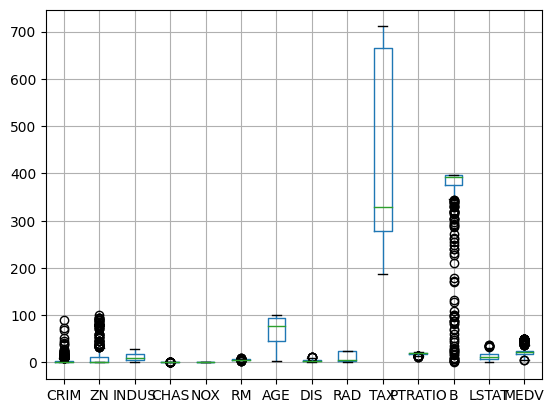

In [5]:
# using default pandas lib
boston_df.boxplot()

In [8]:
len(boston_df.columns)

14

In [11]:
%matplotlib inline

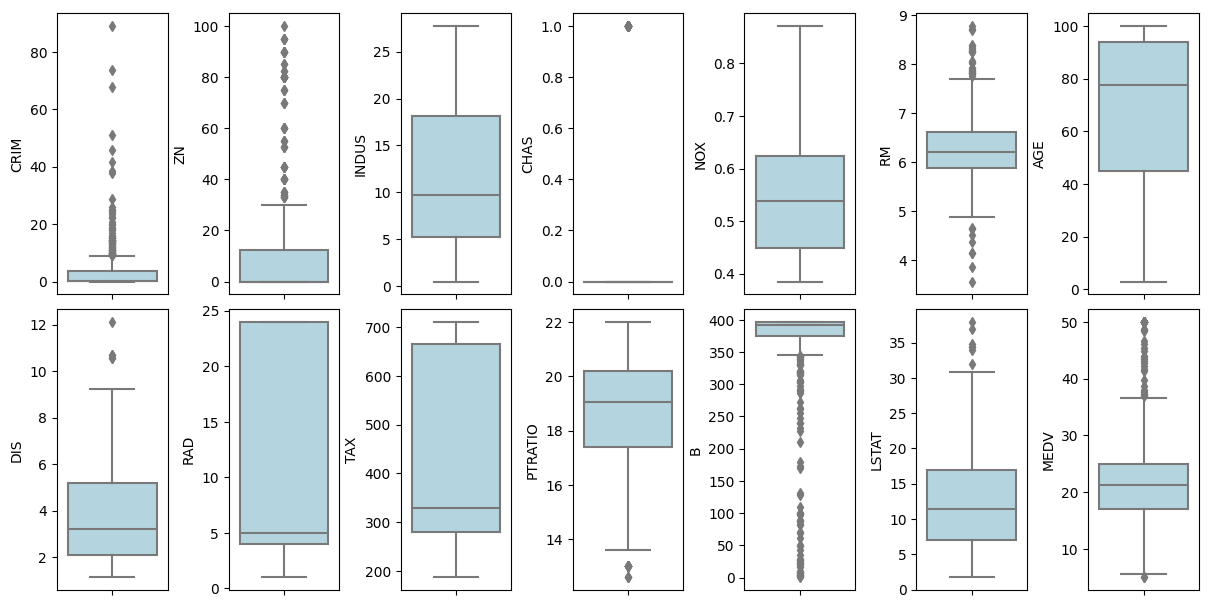

In [15]:
# use loops to automate process above
fig, axs = plt.subplots(nrows=2,ncols=7, figsize=(12,6))

index =0 # resetting the index to iteration
axs = axs.flatten() 

for col in boston_df.columns:
    sns.boxplot(data=boston_df,y=col, ax=axs[index], color='lightblue')
    index +=1 #add 1 to index to move on to next cell

plt.tight_layout(pad=0.4)

We need ot address the outliers for MEDV columns. There are multiple methods:
- IQR: interquartile Method
- Using arbitrary percentiles
- ZScores

![boxplot](https://miro.medium.com/max/8100/1*NRlqiZGQdsIyAu0KzP7LaQ.png)

In [19]:
# let's build a function that can identify the threshold of my outliers (below and above the whiskers values)

def outlier_treat(col):
    # calculate Q1 and Q3 (25th and 75th quartile)
    Q1,Q3 = np.percentile(col, [25,75])

    # calculate for IQR
    IQR = Q3 - Q1

    # calculate the lower and upper ranges (whisker values)
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR

    return lower_range, upper_range
    

In [20]:
lower_range, upper_range = outlier_treat(boston_df['MEDV'])

print(lower_range, upper_range)

5.0624999999999964 36.962500000000006


In [22]:
# get rid fo the outliers
mask = (boston_df['MEDV'] > lower_range) & (boston_df['MEDV'] < upper_range)

boston_df_no = boston_df[mask]

<Axes: xlabel='MEDV'>

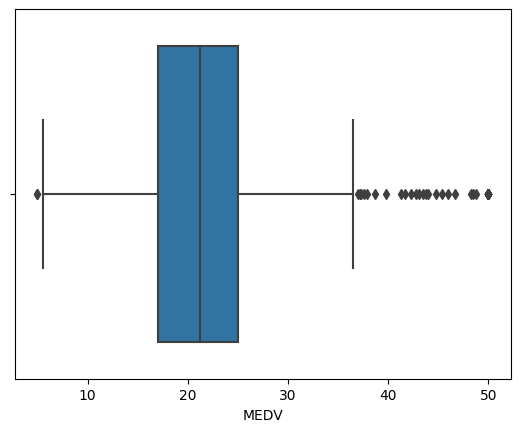

In [25]:
sns.boxplot(boston_df, x='MEDV')

<Axes: xlabel='MEDV'>

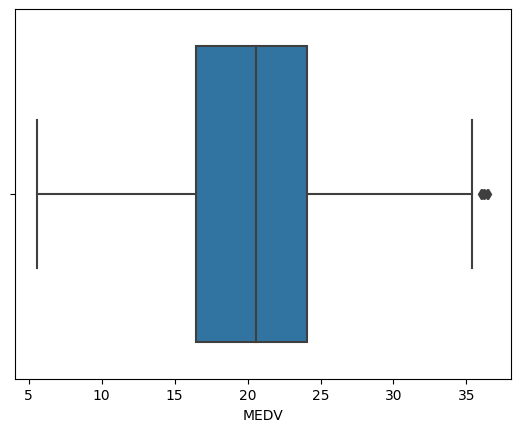

In [24]:
sns.boxplot(boston_df_no, x='MEDV')

Text(0.5, 1.0, 'After Outlier Treatment')

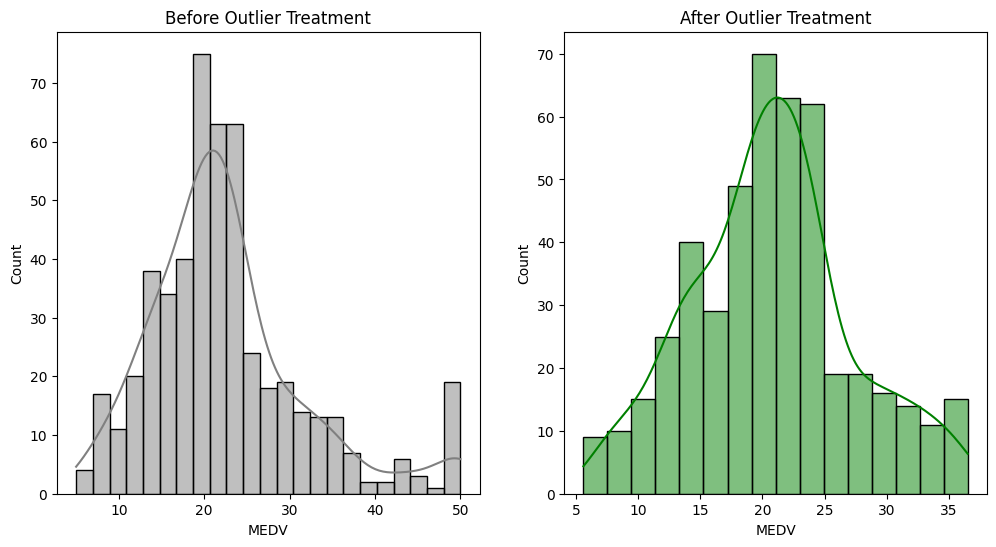

In [30]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(12,6))

axs = axs.flatten()

sns.histplot(boston_df, x='MEDV', ax=axs[0], kde=True, color='grey')
axs[0].set_title('Before Outlier Treatment')
sns.histplot(boston_df_no, x='MEDV', ax=axs[1], kde=True, color='green')
axs[1].set_title('After Outlier Treatment')


<Axes: >

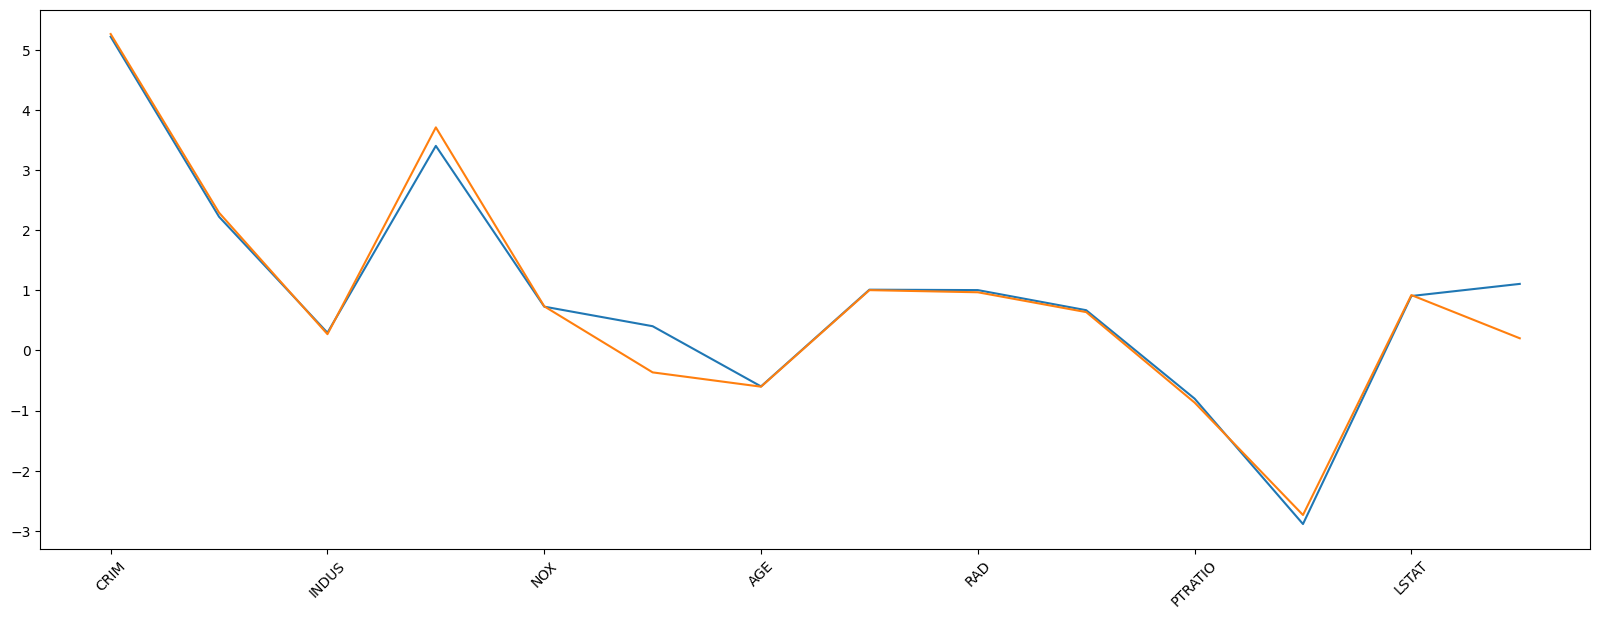

In [36]:
# its recommended to check the impact of skewness on the rest of the columns after removing rows with outliers from MEDV
plt.figure(figsize=(20,7))
boston_df.skew().plot(rot=45)
boston_df_no.skew().plot(rot=45)

### Using ZSscore

In [37]:
from scipy.stats import zscore

boston_df['MEDV_ZScore'] = zscore(boston_df['MEDV'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_ZScore
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.159686
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,-0.101524
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1.324247
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1.182758
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1.487503


In [43]:
threshold = 2.4

mask = (abs(boston_df['MEDV_ZScore']) < threshold)

boston_df_no2 = boston_df[mask]

Text(0.5, 1.0, 'After Outlier Treatment')

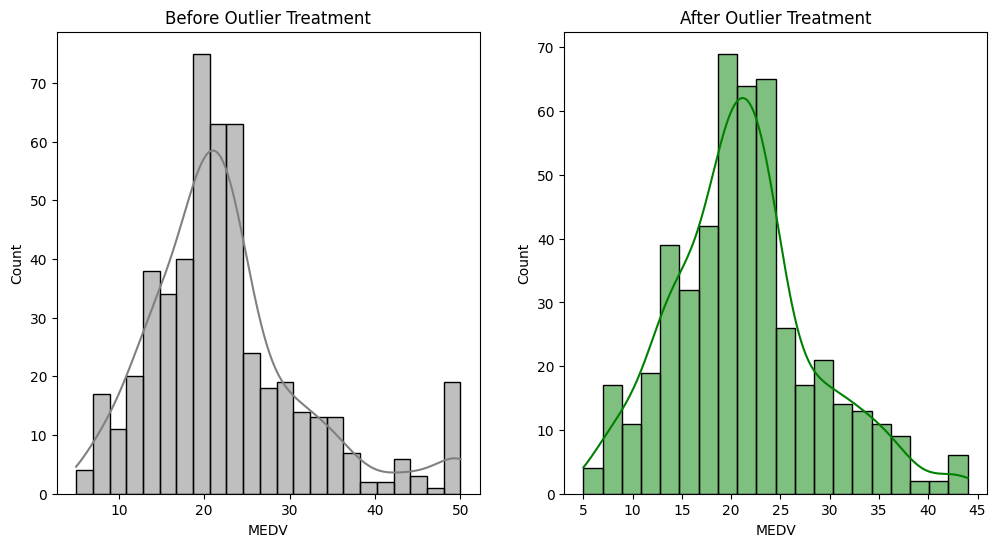

In [44]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(12,6))

axs = axs.flatten()

sns.histplot(boston_df, x='MEDV', ax=axs[0], kde=True, color='grey')
axs[0].set_title('Before Outlier Treatment')
sns.histplot(boston_df_no2, x='MEDV', ax=axs[1], kde=True, color='green')
axs[1].set_title('After Outlier Treatment')


## Binning

In [52]:
boston_df['CRIM'].value_counts(bins=3)

CRIM
(-0.08360000000000001, 29.663]    498
(29.663, 59.32]                     5
(59.32, 88.976]                     3
Name: count, dtype: int64

In [50]:
# extract a new feature that classifies crime rate based on 3 categories: low, med, high

boston_df['CRIM_Cat'] = pd.cut(boston_df['CRIM'], 3, labels=['low', 'med', 'high'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_ZScore,CRIM_Cat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.159686,low
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,-0.101524,low
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1.324247,low
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1.182758,low
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1.487503,low


In [51]:
boston_df['CRIM_Cat'].unique()

['low', 'high', 'med']
Categories (3, object): ['low' < 'med' < 'high']